### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/drugLibTrain_raw.tsv', sep='\t')

In [3]:
df

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
1,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
2,2372,propecia,1,Ineffective,Severe Side Effects,hair loss,"after taking propecia for over a year, startin...","Low sex drive, before i started taking this dr...",one pill once daily
3,1043,vyvanse,9,Highly Effective,Mild Side Effects,add,"My mood has noticably improved, I have more en...","a few experiences of nausiea, heavy moodswings...",I had began taking 20mg of Vyvanse for three m...
4,2715,elavil,10,Considerably Effective,No Side Effects,depression,Although this drug was originally prescribed f...,None.,"One a day, taken about an hour before bedtime."
...,...,...,...,...,...,...,...,...,...
3099,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3100,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
3101,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
3102,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3104 entries, 0 to 3103
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3104 non-null   int64 
 1   urlDrugName        3104 non-null   object
 2   rating             3104 non-null   int64 
 3   effectiveness      3104 non-null   object
 4   sideEffects        3104 non-null   object
 5   condition          3103 non-null   object
 6   benefitsReview     3086 non-null   object
 7   sideEffectsReview  3029 non-null   object
 8   commentsReview     3092 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.4+ KB


In [5]:
df.nunique()

Unnamed: 0           3104
urlDrugName           502
rating                 10
effectiveness           5
sideEffects             5
condition            1425
benefitsReview       3028
sideEffectsReview    2810
commentsReview       3043
dtype: int64

### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

#### Transforma las columnas categoricas

Transforma las columnas categoricas a numericas mediante dummies

In [6]:
df.drop(columns='Unnamed: 0', inplace= True)

In [7]:
df['effectiveness'].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [8]:
df['sideEffects'].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

In [9]:
my_dict = {"Ineffective":0,
            "Marginally Effective":1,
            "Moderately Effective":2,
            "Considerably Effective":3,
            "Highly Effective":4}

In [10]:
my_dict2 = {"No Side Effects":0,
            "Mild Side Effects":1,
            "Moderate Side Effects":2,
            "Severe Side Effects":3,
            "Extremely Severe Side Effects":4}

In [11]:
df['effectiveness'] = df['effectiveness'].map(my_dict)

In [12]:
df['sideEffects'] = df['sideEffects'].map(my_dict2)

In [13]:
dfhandle = df[['rating', 'effectiveness', 'sideEffects']]

In [16]:
dfhandle

,rating,effectiveness,sideEffects
0,4,4,1
1,2,1,3
2,1,0,3
3,9,4,1
4,10,3,0
...,...,...,...
3099,10,4,1
3100,1,0,4
3101,2,1,2
3102,8,3,1


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

#### Genera el K Means 

In [18]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [19]:
kmeans_xk = [KMeans(n_clusters=k, random_state=23).fit(dfhandle) for k in range(2, 21)]

c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\cluster\_kmeans.

In [20]:
kmeans_xk

[KMeans(n_clusters=2, random_state=23),
 KMeans(n_clusters=3, random_state=23),
 KMeans(n_clusters=4, random_state=23),
 KMeans(n_clusters=5, random_state=23),
 KMeans(n_clusters=6, random_state=23),
 KMeans(n_clusters=7, random_state=23),
 KMeans(random_state=23),
 KMeans(n_clusters=9, random_state=23),
 KMeans(n_clusters=10, random_state=23),
 KMeans(n_clusters=11, random_state=23),
 KMeans(n_clusters=12, random_state=23),
 KMeans(n_clusters=13, random_state=23),
 KMeans(n_clusters=14, random_state=23),
 KMeans(n_clusters=15, random_state=23),
 KMeans(n_clusters=16, random_state=23),
 KMeans(n_clusters=17, random_state=23),
 KMeans(n_clusters=18, random_state=23),
 KMeans(n_clusters=19, random_state=23),
 KMeans(n_clusters=20, random_state=23)]

Mayor silhouette scores con K=2

In [21]:
silhouette_scores = [silhouette_score(dfhandle, model.labels_) for model in kmeans_xk]

In [22]:
silhouette_scores

[0.6190566493652461,
 0.454050066862784,
 0.4165207609174424,
 0.4151578247836361,
 0.40733168454011326,
 0.3823276032893191,
 0.39637483781946614,
 0.402967839641486,
 0.40077091837916795,
 0.40640478006427727,
 0.43760487680705795,
 0.43340524958625065,
 0.4229642284263185,
 0.4664670190060596,
 0.47510139971360815,
 0.47584525028710617,
 0.49799199442847725,
 0.5021415362952993,
 0.5052529307663984]

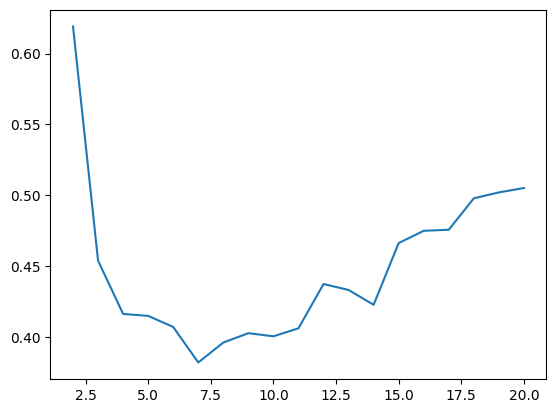

In [23]:
plt.plot(range(2,21), silhouette_scores)

In [24]:
inercias = [model.inertia_ for model in kmeans_xk]
inercias

[11123.041393170835,
 7241.683282421394,
 5677.672219108383,
 4792.369211668961,
 4223.97279161341,
 3783.6517480142056,
 3335.35495701281,
 2984.250677558392,
 2757.293675210259,
 2594.4729788724107,
 2436.591011411652,
 2275.433769853658,
 2194.140483431725,
 2049.445461623702,
 1922.0739894755786,
 1814.2083838693684,
 1778.4306903169745,
 1699.138757235942,
 1581.1851681738558]

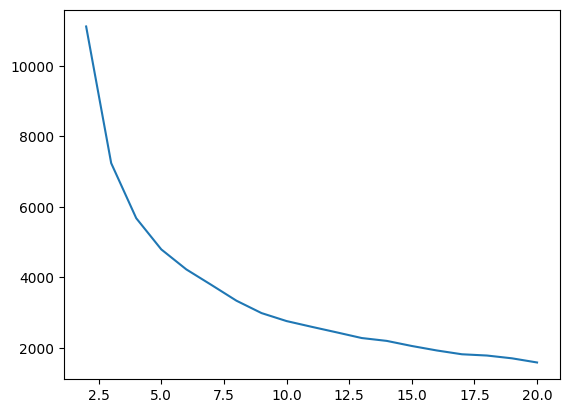

In [25]:
plt.plot(range(2,21), inercias)

Con el Elbow method comprobamos que k=2 sería la opción más adecuada

In [26]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(dfhandle)

c:\Users\taylo\Documents\GitHub\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [30]:
kmeans.labels_

array([1, 1, 1, ..., 1, 0, 1])

#### Muestra en un gráfico de tartas la distribución de los distintos clusters

In [28]:
df_cluster = pd.DataFrame(kmeans.labels_, columns=['Cluster'])

In [31]:
df_cluster

,Cluster
0,1
1,1
2,1
3,0
4,0
...,...
3099,0
3100,1
3101,1
3102,0


<Axes: ylabel='count'>

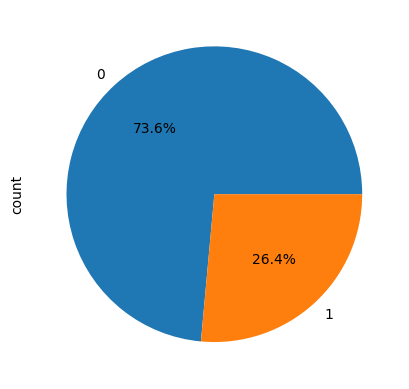

In [29]:
df_cluster['Cluster'].value_counts().plot.pie(autopct="%.1f%%")